In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0-rc1'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [0]:
# divide train set to train and valid sets
# standarize pixel intesities to range (0, 1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

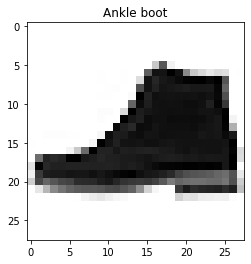

In [17]:
import matplotlib.pyplot as plt

idx = 42

plt.imshow(X_train_full[idx], cmap='Greys')
plt.title(class_names[y_train_full[idx]])

In [19]:
# creating first tensor flow model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
# alternative methods of implementing model

model = keras.models.Sequential([
                    keras.layers.Flatten(input_shape=[28, 28]),
                    keras.layers.Dense(300, activation='relu'),
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(10, activation='softmax')         
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers

In [23]:
model.layers[1].name

'dense_6'

In [24]:
model.get_layer('dense_6')

In [0]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7172 - accuracy: 0.7671 - val_loss: 0.5144 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4890 - accuracy: 0.8289 - val_loss: 0.4430 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4417 - accuracy: 0.8461 - val_loss: 0.4208 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4159 - accuracy: 0.8551 - val_loss: 0.3873 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3961 - accuracy: 0.8605 - val_loss: 0.3955 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3814 - accuracy: 0.8661 - val_loss: 0.3768 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8702 - val_loss: 0.3545 - val_accuracy:

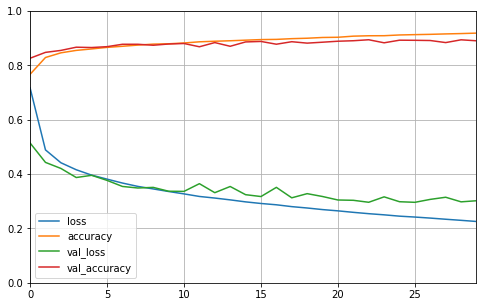

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.3217 - accuracy: 0.8601


[59.32170486450195, 0.8600999712944031]